# 10.1.a

In [1]:
import keras

In [2]:
def tokenize(sentence):
    tokens = keras.preprocessing.text.text_to_word_sequence(sentence)
    return(tokens)

In [3]:
tokens = tokenize("The five boxing wizards jump quickly.")
tokens

['the', 'five', 'boxing', 'wizards', 'jump', 'quickly']

# 10.1.b

In [4]:
def ngram(tokens, n):
    ngrams = []
    for i in range(len(tokens)-n+1):
        ngram = ' '.join(word_list for word_list in tokens[i:i+n])
        ngrams.append(ngram)
    return(ngrams)

In [5]:
ngram = ngram(tokens,4)
ngram

['the five boxing wizards',
 'five boxing wizards jump',
 'boxing wizards jump quickly']

# 10.1.c

In [6]:
def one_hot_encode(tokens, num_words = len(set(tokens))):
    num_words += 1 
    tokenizer = keras.preprocessing.text.Tokenizer(num_words = num_words)
    tokenizer.fit_on_texts(tokens)
    sequences = tokenizer.texts_to_sequences(tokens)
    results = tokenizer.texts_to_matrix(tokens, mode='binary')
    results = results[:, 1:]
    token_index = tokenizer.word_index
    return(results)

In [10]:
one_hot_encode(tokens)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

# 10.2

In [11]:
import os
import numpy as np

imdb_dir = '/home/jovyan/dsc650/data/external/imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [12]:
max_words = 1000
embedding_dim = 100
maxlen = 100
training_samples = 200
validation_samples = 1000

In [13]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

data = keras.preprocessing.sequence.pad_sequences(sequences,maxlen=maxlen)
labels = np.asarray(labels)

In [14]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

In [15]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [16]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [17]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          100000    
_________________________________________________________________
dense (Dense)                (None, 100, 32)           3232      
_________________________________________________________________
dense_1 (Dense)              (None, 100, 1)            33        
Total params: 103,265
Trainable params: 103,265
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 79ms/step - loss: 0.6925 - acc: 0.5168 - val_loss: 0.6921 - val_acc: 0.5181
Epoch 2/10
7/7 [==============================] - 0s 29ms/step - loss: 0.6830 - acc: 0.5878 - val_loss: 0.6921 - val_acc: 0.5203
Epoch 3/10
7/7 [==============================] - 0s 26ms/step - loss: 0.6819 - acc: 0.5775 - val_loss: 0.6918 - val_acc: 0.5244
Epoch 4/10
7/7 [==============================] - 0s 25ms/step - loss: 0.6715 - acc: 0.6242 - val_loss: 0.6920 - val_acc: 0.5252
Epoch 5/10
7/7 [==============================] - 0s 26ms/step - loss: 0.6692 - acc: 0.6189 - val_loss: 0.6919 - val_acc: 0.5280
Epoch 6/10
7/7 [==============================] - 0s 31ms/step - loss: 0.6752 - acc: 0.5862 - val_loss: 0.6932 - val_acc: 0.5296
Epoch 7/10
7/7 [==============================] - 0s 26ms/step - loss: 0.6732 - acc: 0.5891 - val_loss: 0.6941 - val_acc: 0.5312
Epoch 8/10
7/7 [==============================] - 0s 25ms/step - loss: 0.6668 - acc: 0.5969 - val

In [19]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [20]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [21]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7005 - acc: 0.5270


[0.7004918456077576, 0.5269619822502136]

In [22]:
import matplotlib.pyplot as plt

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

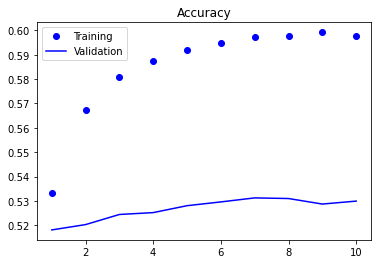

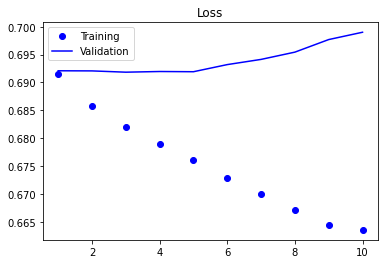

In [24]:
plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'b', label='Validation')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'b', label='Validation')
plt.title('Loss')
plt.legend()

plt.show()

# 10.3

In [25]:
from keras.layers import LSTM

In [26]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 2s 502ms/step - loss: 0.6916 - acc: 0.5344 - val_loss: 0.6843 - val_acc: 0.6000
Epoch 2/10
2/2 [==============================] - 0s 135ms/step - loss: 0.6777 - acc: 0.5516 - val_loss: 0.6808 - val_acc: 0.6500
Epoch 3/10
2/2 [==============================] - 0s 123ms/step - loss: 0.6640 - acc: 0.6443 - val_loss: 0.6686 - val_acc: 0.6000
Epoch 4/10
2/2 [==============================] - 0s 134ms/step - loss: 0.6384 - acc: 0.5766 - val_loss: 0.6542 - val_acc: 0.6000
Epoch 5/10
2/2 [==============================] - 0s 123ms/step - loss: 0.5928 - acc: 0.5740 - val_loss: 0.6778 - val_acc: 0.6000
Epoch 6/10
2/2 [==============================] - 0s 127ms/step - loss: 0.5275 - acc: 0.6557 - val_loss: 0.6427 - val_acc: 0.6500
Epoch 7/10
2/2 [==============================] - 0s 125ms/step - loss: 0.5156 - acc: 0.8922 - val_loss: 0.6316 - val_acc: 0.6500
Epoch 8/10
2/2 [==============================] - 0s 136ms/step - loss: 0.4683 - acc: 0.92

In [28]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 13s 17ms/step - loss: 0.6564 - acc: 0.6064


[0.6563993096351624, 0.6064000129699707]

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

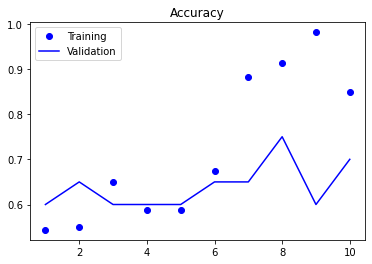

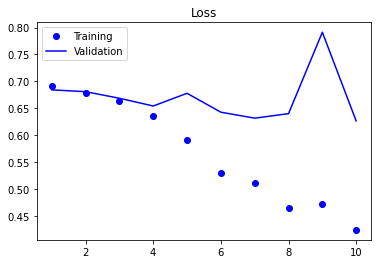

In [32]:
plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'b', label='Validation')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'b', label='Validation')
plt.title('Loss')
plt.legend()

plt.show()

# 10.4

In [33]:
from keras import layers
from keras.optimizers import RMSprop

In [34]:
max_features = 1000
max_len = 100

In [35]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          128000    
_________________________________________________________________
conv1d (Conv1D)              (None, 94, 32)            28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 18, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 12, 32)            7200      
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 385       
Total params: 164,289
Trainable params: 164,289
Non-trainable params: 0
________________________________________________

In [36]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 177ms/step - loss: 8.0245 - acc: 0.4661 - val_loss: 7.0168 - val_acc: 0.4000
Epoch 2/100
2/2 [==============================] - 0s 64ms/step - loss: 6.6574 - acc: 0.4609 - val_loss: 4.1004 - val_acc: 0.4000
Epoch 3/100
2/2 [==============================] - 0s 44ms/step - loss: 3.8734 - acc: 0.4635 - val_loss: 3.4342 - val_acc: 0.4000
Epoch 4/100
2/2 [==============================] - 0s 51ms/step - loss: 3.1328 - acc: 0.4635 - val_loss: 2.8710 - val_acc: 0.4000
Epoch 5/100
2/2 [==============================] - 0s 53ms/step - loss: 2.5318 - acc: 0.4661 - val_loss: 2.7081 - val_acc: 0.4000
Epoch 6/100
2/2 [==============================] - 0s 40ms/step - loss: 2.2535 - acc: 0.4766 - val_loss: 2.2562 - val_acc: 0.4000
Epoch 7/100
2/2 [==============================] - 0s 52ms/step - loss: 2.1217 - acc: 0.4766 - val_loss: 2.0840 - val_acc: 0.4000
Epoch 8/100
2/2 [==============================] - 0s 48ms/step - loss: 2.0798 - acc: 0.4

In [37]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.6849 - acc: 0.5537


[0.6849227547645569, 0.5536800026893616]

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

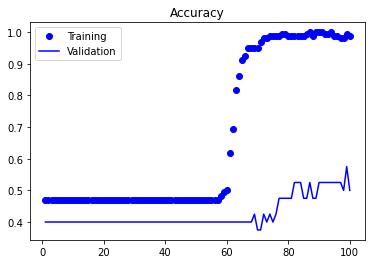

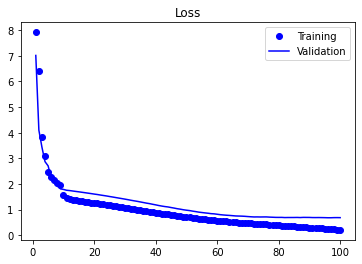

In [39]:
plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'b', label='Validation')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'b', label='Validation')
plt.title('Loss')
plt.legend()

plt.show()